# **Masking  data outside the Gulf of Mexico** 
- **Code written by: Billy Atkinson (watkinson@umces.edu)** 
- **Date of Last Revision: 08/11/2022** 
- **This code reads in the HYCOM ADT data and masks out the values outside of the Gulf of Mexico using two straight lines** 
    - **One line runs from Cancun to southern tip of Florida and the other runs from the tip of southern Florida to a point in the U.S.**

# Packages needed for masking output and loading data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
import xarray as xr
import pandas as pd

# Load in data that will be masked
    Example is for  March 9, 2006

In [19]:
dir = "/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/"
SSH_data = xr.open_dataset(dir + "hycom_gomu_501_2006030900_t000.nc")
SSH_data

<xarray.Dataset>
Dimensions:  (time: 1, lon: 541, lat: 346)
Coordinates:
  * time     (time) datetime64[ns] 2006-03-09
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Data variables:
    adt      (lat, lon, time) float32 ...
    ugos     (lat, lon, time) float32 ...
    vgos     (lat, lon, time) float32 ...

# Plot the current output of SSH data

Text(0.5, 0, 'SSH (m)')

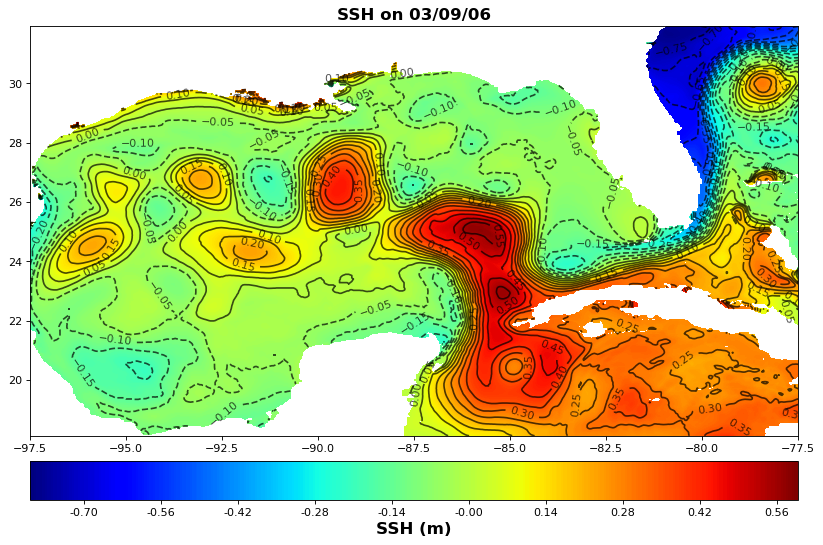

In [20]:
#create axes and figure parameters
fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_axes([.03,.03,.8,.8])
ax.set_xlim(-97.5, -77.5)
plt.title('SSH on 03/09/06',loc='center',fontsize=15,fontweight='bold')

#load in lat, lon and SSH data for plot 
lat = SSH_data.lat
lon = SSH_data.lon
ssh = SSH_data.adt

#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)

#plot with contourf and contour functions
cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(-.8,.6,400))
cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(-.8,.6,.05))
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')

# Create function that computes the slope and y-intecept of a line

In [21]:
def slope_intercept(x1,y1,x2,y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - (m * x1)    
    return m,b

# Apply custom mask to SSH data
> Line 1: lat = .3732(lon) + 53.49    
> Line 2: lat = -1.746(lon) - 115.1

In [22]:
lon = SSH_data.lon
lat = SSH_data.lat
adt = SSH_data.adt[:,:,0]
#call function to calculate slope and y intercept for two seperate lines used to mask
m1,b1 = slope_intercept(-86.846502,21.077478,-79.541586,23.803416)
m2,b2 = slope_intercept(-79.541586,23.803416,-85.266082,33.802249)
#mask using line 1
adt_mask = ma.masked_where((lat < (m1 * lon) + b1), adt)
#mask using line 2
adt_mask = ma.masked_where((lat > (m2 * lon) + b2), adt_mask)
#adt_mask = ma.masked_where((lat < (.64949701 * lon) + 77.484021), adt)
#adt_mask = ma.masked_where((lat > (-1.746232677 * lon) - 115.0921697), adt_mask)
ma.set_fill_value(adt_mask,np.nan)
adt_mask

masked_array(
  data=[[nan, nan, nan, ..., --, --, --],
        [nan, nan, nan, ..., --, --, --],
        [nan, nan, nan, ..., --, --, --],
        ...,
        [nan, nan, nan, ..., --, --, --],
        [nan, nan, nan, ..., --, --, --],
        [nan, nan, nan, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=nan,
  dtype=float32)

# Plot the original SSH data and the masked SSH data to review results

Text(0.5, 0, 'SSH (m)')

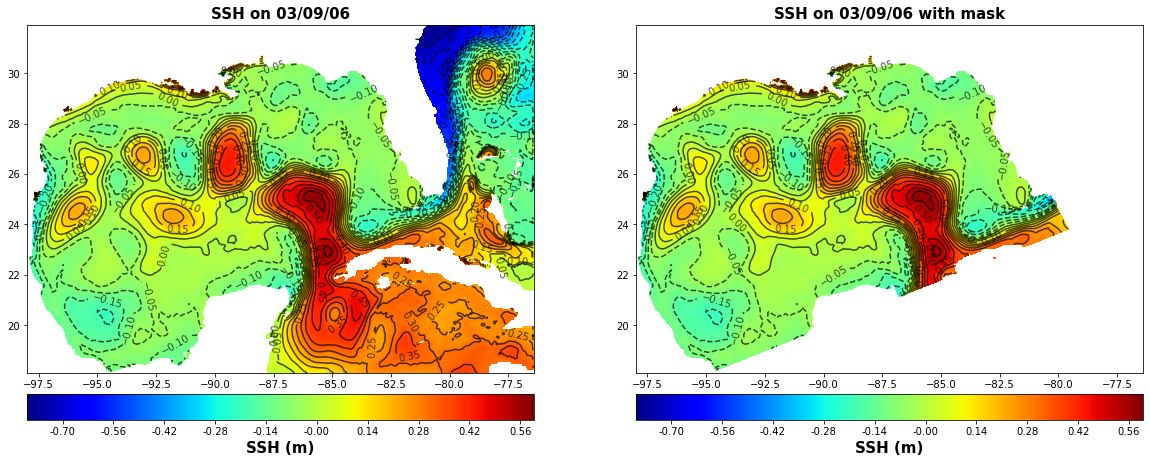

In [23]:
#create xes and figure parameters
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.set_title('SSH on 03/09/06',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('SSH on 03/09/06 with mask',loc='center',fontsize=15,fontweight='bold')
#load in lat, lon and SSh data for plot
lat=SSH_data.lat
lon=SSH_data.lon
ssh = SSH_data.adt

#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)
#plot original SSH using contourf and contour
cf = ax1.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(-.8,.6,400))
cl = ax1.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(-.8,.6,.05))
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,ax=ax1,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')

#plot masked SSH using contourf and contour
cf2 = ax2.contourf(lon2d,lat2d,adt_mask,cmap='jet',levels=np.linspace(-.8,.6,400))
cl2 = ax2.contour(lon2d,lat2d,adt_mask,colors='k',alpha=.7,levels=np.arange(-.8,.6,.05))
plt.clabel(cl2, inline=1, fontsize=10)
cbar = fig.colorbar(cf2,ax=ax2,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')